# Part 1:
Data Loading and Preparation. Load the diabetes dataset into two numpy arrays: one for the feature set and one for the target. Pick a single feature to try to predict the target (disease progression). Document the reason you chose the feature you did. Break your single feature and target sets into training and test sets with the last 20 rows being in the test set.<p></p><p></p>
https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset  This site helped to spell out more what the serums were about.

First line here did exploring stuff:

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import sklearn

from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()
print(diabetes_dataset.keys())
print(diabetes_dataset['feature_names'],"\n--\n")
print(diabetes_dataset['DESCR'])
# print(diabetes_dataset['data_filename'])
print(diabetes_dataset['data'][0], "CHECK it here \n*******\n")
print(diabetes_dataset['target'][0])
print("\nCHECKING ", diabetes_dataset.data[7])

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] 
--

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-densit

**From instructions: Load the diabetes dataset into two numpy arrays: one for the feature set and one for the target.**

In [3]:
dataFeatures = pd.DataFrame(diabetes_dataset.data, columns=diabetes_dataset.feature_names)

In [4]:
target = pd.DataFrame(diabetes_dataset.target, columns = ['DisProg'])
#DisProg is for Disease Progression
dataFeaturesWtarget = dataFeatures
dataFeaturesWtarget['DisProgYr']=diabetes_dataset.target
dataFeaturesWtarget.head(5)
corr_matrix = dataFeaturesWtarget.corr()
corr_matrix['DisProgYr'].sort_values(ascending=False)

DisProgYr    1.000000
bmi          0.586450
s5           0.565883
bp           0.441484
s4           0.430453
s6           0.382483
s1           0.212022
age          0.187889
s2           0.174054
sex          0.043062
s3          -0.394789
Name: DisProgYr, dtype: float64

**From instructions: Pick a single feature to try to predict the target.**

Picking Body Mass Index (BMI) as a single feature to predict the target. It seems like a good candidate that kind of measures dietary choices that could lead to diabetes or complicate diabetes. Blood Pressue would also be good but we'll start with BMI because you have to start somewhere. List location is 2 or 'bmi'. Also, in a correlation test it seems to be highly correlated.

**From Instructions: Break your single feature and target sets into training and test sets with the last 20 rows being in the test set** So I will break into single feature. (Just did the target) but will do the last 20 rows condition too.  **Decided to later split out after the random pull in training just in case.**

In [5]:
# dataBMI = pd.DataFrame(diabetes_dataset.data[0], columns=['BMI'])
dataBMI = dataFeatures['bmi']

In [6]:
#Do this to get the last 20 rows as requested in instructions:
dataBMI.head(5)
print(len(dataBMI))
print('20% of data for training:',len(dataBMI)*.2,"round up to", math.ceil(len(dataBMI)*.2), "as sci kit seems to")
print("if last 20 rows need to be in the training, then 69 rows from 422 is __%:", (69/422))
newPerc=math.floor(422*.164)
print(newPerc)

442
20% of data for training: 88.4 round up to 89 as sci kit seems to
if last 20 rows need to be in the training, then 69 rows from 422 is __%: 0.16350710900473933
69


In [7]:
#prepping the data
from sklearn.model_selection import train_test_split
dataTestLast20=dataFeaturesWtarget[-20:]
dataLessTheLast=dataFeaturesWtarget[:-20]

#OLD WAY where I misunderstood:
# Making the Training and test sets using the last 20 rows but getting 20% too like in example:
# oldTrain_set, oldTest_set = train_test_split(dataLessTheLast, test_size=newPerc, random_state=42)
# fullTestSet= test_set+dataTestLast20
# NEW: Making the Training and test sets using the last 20 rows only.
train_set = dataLessTheLast
fullTestSet = dataTestLast20

#now Train Set has the whole set. 
#--DID some clever research to set to numpy and then to get the same reshaping done
trainSetNpBMI=np.array(train_set['bmi'])
trainBMI=trainSetNpBMI.reshape(-1,1)
trainSetNpTarg=np.array(train_set['DisProgYr'])
trainTarg=trainSetNpTarg.reshape(-1,1)

fullTestNpBMI=np.array(fullTestSet['bmi'])
fullTestBMI=fullTestNpBMI.reshape(-1,1)
fullTestNpTarg=np.array(fullTestSet['DisProgYr'])
fullTestTarg=fullTestNpTarg.reshape(-1,1)
# print(trainBMI.shape, "just bmi train")
print(train_set[:5])
print(train_set['bmi'].shape)
print(trainBMI.shape)
print(trainBMI[:5])

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  DisProgYr  
0 -0.002592  0.019908 -0.017646      151.0  
1 -0.039493 -0.068330 -0.092204       75.0  
2 -0.002592  0.002864 -0.025930      141.0  
3  0.034309  0.022692 -0.009362      206.0  
4 -0.002592 -0.031991 -0.046641      135.0  
(422,)
(422, 1)
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


In [8]:
# Looking into the splits and stuff:
# print(target.head(5))
# dataFeatures.head(5)
# dataFeatures.describe()
# print(dataLessTheLast[:5])

In [9]:
#Early on I had pulled apart and kept separate target from features 
#but realized that they needed to be split in training and test sets together
print(dataFeaturesWtarget.shape,"Full set")
print(train_set.shape, "Train set split 80/20")
print(trainBMI.shape, "just bmi train")
print(trainTarg.shape, "just targ train")
print(fullTestSet.shape, "Test set with last 20 rows")
print(fullTestBMI.shape, "just bmi test")
print(fullTestTarg.shape, "just target test")
print(type(train_set.shape))
# print(train_set[:5])

(442, 11) Full set
(422, 11) Train set split 80/20
(422, 1) just bmi train
(422, 1) just targ train
(20, 11) Test set with last 20 rows
(20, 1) just bmi test
(20, 1) just target test
<class 'tuple'>


# Part 2:
Model Training. Instantiate a linear regression model, and train it with your single feature and target sets.

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# print(trainBMI.head(5))
# print(trainTarg.head(5))
# print(type(lr),"type LR")
# train_singleSet=pd.DataFrame(train_set['bmi'], columns=['bmi'])
# train_singleSet['target']=train_set['DisProgYr']
# print(train_singleSet.head(5))
# train_singleSet['target']=trainTarg
# train_singleSet.head(5)
# print(lr.fit(train_singleSet['bmi'], train_singleSet['target']), "Fit method")

# lr.fit(train_singleSet['bmi'], train_singleSet['target'])
lr.fit(trainBMI,trainTarg)

LinearRegression()

# Part 3:
Prediction and Measurement. List the first 10 predictions on your single feature **training set.** Print out the feature coefficient and the root mean squared error of your model.

In [11]:
from sklearn.metrics import mean_squared_error #,r2_score

bmiPredictions=lr.predict(trainBMI)
print("Predict method Training set:", bmiPredictions[0:10])
bmiPredictionsTEST=lr.predict(fullTestBMI)
print("Predict methodTEST:", bmiPredictionsTEST[0:10])

print("BMI - Coefficient:", lr.coef_)

mseTrain = mean_squared_error(trainTarg, bmiPredictions)
rmseTrain = np.sqrt(mseTrain)
print("Train Mean Squared Error: ", mseTrain)
print("Root Train Mean Squared Error: ", rmseTrain)
bmiTestPredict=lr.predict(fullTestBMI)
mseTest = mean_squared_error(fullTestTarg, bmiTestPredict)
rmseTest = np.sqrt(mseTest)
print("Test Mean Squared Error: ", mseTest)
print("Root TEST Mean Squared Error: ", rmseTest)

Predict method Training set: [[210.80457868]
 [104.6239487 ]
 [194.62467316]
 [142.03998022]
 [118.78136603]
 [114.73638965]
 [108.66892508]
 [151.14117707]
 [210.80457868]
 [189.56845268]]
Predict methodTEST: [[225.9732401 ]
 [115.74763374]
 [163.27610621]
 [114.73638965]
 [120.80385422]
 [158.21988574]
 [236.08568105]
 [121.81509832]
 [ 99.56772822]
 [123.83758651]]
BMI - Coefficient: [[938.23786125]]
Train Mean Squared Error:  3955.019853401393
Root Train Mean Squared Error:  62.888948579232846
Test Mean Squared Error:  2548.0723987259694
Root TEST Mean Squared Error:  50.478434986892864


# Part 4:
Visualization. Print out a scatter plot with the feature you chose on the x-axis, and progression on the y-axis. Plot the regression line on this same graph with appropriate labels on each axis.

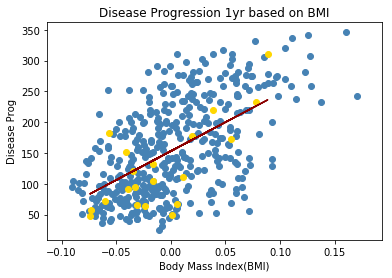

In [12]:
import matplotlib.pyplot as plt
plt.scatter(trainBMI, trainTarg, color="steelblue")
plt.scatter(fullTestBMI, fullTestTarg, color="gold")
plt.plot(fullTestBMI, lr.predict(fullTestBMI), color = 'darkred')
plt.title('Disease Progression 1yr based on BMI')
plt.xlabel('Body Mass Index(BMI)')
plt.ylabel('Disease Prog')
plt.show()